In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate, Dot, Lambda
from keras.optimizers import Adam
from keras import backend as K

from sklearn.metrics import precision_score, recall_score, ndcg_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
dataset = 'ml1m'  # MovieLens 1M dataset
latent_dim = 5
like_threshold = 4
steps_per_epoch = None

deepmf_epochs = 10
ncf_epochs = 10
neumf_epochs = 10
vdeepmf_epochs = 6
vncf_epochs=10

# Load the dataset
df = pd.read_csv('/ml1m.csv', delimiter=',')

In [ ]:
num_users = df.user.max() + 1
num_items = df.item.max() + 1

X = df[['user', 'item']].to_numpy()
y = df[['rating']].to_numpy()

In [ ]:
#Dataset split into train and test partitions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = [X_train[:, 0], X_train[:, 1]]
X_test = [X_test[:, 0], X_test[:, 1]]


# **DeepMF Model**

In [ ]:
# DeepMF Model
user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim)(user_input)
user_vec = Flatten()(user_embedding)

item_input = Input(shape=[1])
item_embedding = Embedding(num_items, latent_dim)(item_input)
item_vec = Flatten()(item_embedding)

dot = Dot(axes=1)([item_vec, user_vec])

DeepMF = Model([user_input, item_input], dot)

with tf.device('/GPU:1'):
    DeepMF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    DeepMF.summary()

    deepmf_report = DeepMF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=deepmf_epochs, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 5)      │     18,530 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 5)      │     30,200 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 5)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ flatten_1[0][0],  │
│                     │                   │            │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,730 (190.35 KB)

 Trainable params: 48,730 (190.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 8.4971 - mae: 2.4981 - val_loss: 1.0466 - val_mae: 0.7966
Epoch 2/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 0.9571 - mae: 0.7659 - val_loss: 0.8878 - val_mae: 0.7418
Epoch 3/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 0.8732 - mae: 0.7358 - val_loss: 0.8720 - val_mae: 0.7361
Epoch 4/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 0.8578 - mae: 0.7306 - val_loss: 0.8641 - val_mae: 0.7331
Epoch 5/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.8494 - mae: 0.7264 - val_loss: 0.8567 - val_mae: 0.7292
Epoch 6/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.8352 - mae: 0.7197 - val_loss: 0.8384 - val_mae: 0.7217
Epoch 7/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.8151 - mae: 0.7105 - val_loss: 0.8236 - val_mae: 0.7141
Epoch 8/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.7931 - mae: 0.7001 - val_loss: 0.8091 - val_mae: 0.7066
Epoch 9/10
25006

# **NCF Model**

In [ ]:
# NCF Model
item_input = Input(shape=[1], name='item-input')
item_embedding = Embedding(num_items, latent_dim, name='item-embedding')(item_input)
item_vec = Flatten(name='item-flatten')(item_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Concatenate(axis=1, name='item-user-concat')([item_vec, user_vec])
fc_1 = Dense(70, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.5, name='fc-1-dropout')(fc_1)
fc_2 = Dense(30, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.4, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

NCF = Model([user_input, item_input], fc_3)

with tf.device('/GPU:1'):
    NCF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    NCF.summary()

    ncf_report = NCF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=ncf_epochs, steps_per_epoch=steps_per_epoch, verbose=1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ item-input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-embedding      │ (None, 1, 5)      │     18,530 │ item-input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-embedding      │ (None, 1, 5)      │     30,200 │ user-input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-flatten        │ (None, 5)         │          0 │ item-embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user-flatten        │ (None, 5)         │          0 │ user-embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item-user-concat    │ (None, 10)        │          0 │ item-flatten[0][… │
│ (Concatenate)       │                   │            │ user-flatten[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-1 (Dense)        │ (None, 70)        │        770 │ item-user-concat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-1-dropout        │ (None, 70)        │          0 │ fc-1[0][0]        │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-2 (Dense)        │ (None, 30)        │      2,130 │ fc-1-dropout[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-2-dropout        │ (None, 30)        │          0 │ fc-2[0][0]        │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-3 (Dense)        │ (None, 1)         │         31 │ fc-2-dropout[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 51,661 (201.80 KB)

 Trainable params: 51,661 (201.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 1.3833 - mae: 0.9163 - val_loss: 0.8548 - val_mae: 0.7380
Epoch 2/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - loss: 0.8489 - mae: 0.7295 - val_loss: 0.8290 - val_mae: 0.7249
Epoch 3/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 133s 3ms/step - loss: 0.8258 - mae: 0.7179 - val_loss: 0.8065 - val_mae: 0.7098
Epoch 4/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.8110 - mae: 0.7102 - val_loss: 0.7952 - val_mae: 0.7035
Epoch 5/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 147s 3ms/step - loss: 0.8020 - mae: 0.7058 - val_loss: 0.7890 - val_mae: 0.6964
Epoch 6/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 0.7929 - mae: 0.7005 - val_loss: 0.7917 - val_mae: 0.7054
Epoch 7/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.7872 - mae: 0.6977 - val_loss: 0.7911 - val_mae: 0.7012
Epoch 8/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.7808 - mae: 0.6946 - val_loss: 0.7901 - val_mae: 0.6947
Epoch 9/10
250

# **Variational DeepMF Model**

In [ ]:
# Variational DeepMF Model
batch_size = 32

def sampling(args):
    z_mean, z_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean), mean=0.0, stddev=1.0)

    return z_mean + tf.exp(z_var) * epsilon

user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim)(user_input)
user_embedding_mean = Dense(latent_dim)(user_embedding)
user_embedding_var = Dense(latent_dim)(user_embedding)
user_embedding_z = Lambda(sampling, output_shape=(1, latent_dim))([user_embedding_mean, user_embedding_var])

user_vec = Flatten()(user_embedding_z)

item_input = Input(shape=[1])
item_embedding = Embedding(num_items, latent_dim)(item_input)
item_embedding_mean = Dense(latent_dim)(item_embedding)
item_embedding_var = Dense(latent_dim)(item_embedding)
item_embedding_z = Lambda(sampling, output_shape=(1, latent_dim))([item_embedding_mean, item_embedding_var])
item_vec = Flatten()(item_embedding_z)

dot = Dot(axes=1)([item_vec, user_vec])

VDeepMF = Model([user_input, item_input], dot)

with tf.device('/GPU:1'):
    VDeepMF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    VDeepMF.summary()

    vdeepmf_report = VDeepMF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=vdeepmf_epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch, verbose=1)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 1, 5)      │     18,530 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 5)      │     30,200 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1, 5)      │         30 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1, 5)      │         30 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1, 5)      │         30 │ embedding_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1, 5)      │         30 │ embedding_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_10 (Lambda)  │ (None, 1, 5)      │          0 │ dense_20[0][0],   │
│                     │                   │            │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_9 (Lambda)   │ (None, 1, 5)      │          0 │ dense_18[0][0],   │
│                     │                   │            │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 5)         │          0 │ lambda_10[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 5)         │          0 │ lambda_9[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_5 (Dot)         │ (None, 1)         │          0 │ flatten_11[0][0], │
│                     │                   │            │ flatten_10[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,850 (190.82 KB)

 Trainable params: 48,850 (190.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - loss: 4.0214 - mae: 1.3967 - val_loss: 0.8221 - val_mae: 0.7140
Epoch 2/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 102s 4ms/step - loss: 0.8004 - mae: 0.7049 - val_loss: 0.7885 - val_mae: 0.6994
Epoch 3/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - loss: 0.7583 - mae: 0.6838 - val_loss: 0.7721 - val_mae: 0.6910
Epoch 4/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.7377 - mae: 0.6734 - val_loss: 0.7638 - val_mae: 0.6868
Epoch 5/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 0.7218 - mae: 0.6650 - val_loss: 0.7586 - val_mae: 0.6855
Epoch 6/6
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - loss: 0.7134 - mae: 0.6609 - val_loss: 0.7570 - val_mae: 0.6823


# **Variational NCF Model**

In [ ]:
# Variational NCF Model
batch_size = 32

def sampling(args):
    z_mean, z_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean), mean=0.0, stddev=1.0)
    return z_mean + tf.exp(z_var) * epsilon


user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim)(user_input)
user_embedding_mean = Dense(latent_dim)(user_embedding)
user_embedding_var = Dense(latent_dim)(user_embedding)
user_embedding_z = Lambda(sampling, output_shape=(1, latent_dim))([user_embedding_mean, user_embedding_var])

user_vec = Flatten()(user_embedding_z)

item_input = Input(shape=[1])
item_embedding = Embedding(num_items + 1, latent_dim)(item_input)
item_embedding_mean = Dense(latent_dim)(item_embedding)
item_embedding_var = Dense(latent_dim)(item_embedding)
item_embedding_z = Lambda(sampling, output_shape=(1, latent_dim))([item_embedding_mean, item_embedding_var])
item_vec = Flatten()(item_embedding_z)

concat = Concatenate(axis=1)([item_vec, user_vec])

fc_1 = Dense(80, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.6, name='fc-1-dropout')(fc_1)
fc_2 = Dense(25, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.4, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

VNCF = Model([user_input, item_input], fc_3)

with tf.device('/GPU:1'):
    VNCF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    VNCF.summary()

    vncf_report = VNCF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=vncf_epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch, verbose=1)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_18      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 1, 5)      │     18,535 │ input_layer_19[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 1, 5)      │     30,200 │ input_layer_18[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 1, 5)      │         30 │ embedding_19[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1, 5)      │         30 │ embedding_19[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1, 5)      │         30 │ embedding_18[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1, 5)      │         30 │ embedding_18[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_17 (Lambda)  │ (None, 1, 5)      │          0 │ dense_34[0][0],   │
│                     │                   │            │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_16 (Lambda)  │ (None, 1, 5)      │          0 │ dense_32[0][0],   │
│                     │                   │            │ dense_33[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 5)         │          0 │ lambda_17[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 5)         │          0 │ lambda_16[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 10)        │          0 │ flatten_17[0][0], │
│ (Concatenate)       │                   │            │ flatten_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-1 (Dense)        │ (None, 80)        │        880 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-1-dropout        │ (None, 80)        │          0 │ fc-1[0][0]        │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-2 (Dense)        │ (None, 25)        │      2,025 │ fc-1-dropout[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-2-dropout        │ (None, 25)        │          0 │ fc-2[0][0]        │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc-3 (Dense)        │ (None, 1)         │         26 │ fc-2-dropout[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 51,786 (202.29 KB)

 Trainable params: 51,786 (202.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 105s 4ms/step - loss: 1.4452 - mae: 0.9489 - val_loss: 0.8486 - val_mae: 0.7301
Epoch 2/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 96s 4ms/step - loss: 0.8661 - mae: 0.7356 - val_loss: 0.8216 - val_mae: 0.7153
Epoch 3/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - loss: 0.8433 - mae: 0.7233 - val_loss: 0.8147 - val_mae: 0.7107
Epoch 4/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - loss: 0.8329 - mae: 0.7187 - val_loss: 0.8079 - val_mae: 0.7087
Epoch 5/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step - loss: 0.8248 - mae: 0.7146 - val_loss: 0.8027 - val_mae: 0.7034
Epoch 6/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 152s 4ms/step - loss: 0.8160 - mae: 0.7101 - val_loss: 0.7953 - val_mae: 0.7018
Epoch 7/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 100s 4ms/step - loss: 0.8126 - mae: 0.7093 - val_loss: 0.7934 - val_mae: 0.7043
Epoch 8/10
25006/25006 ━━━━━━━━━━━━━━━━━━━━ 103s 4ms/step - loss: 0.8033 - mae: 0.7049 - val_loss: 0.7896 - val_mae: 0.7000
Epoch 9/10


# **Evaluation**

In [ ]:
# Evaluation
methods = ['vdeepmf', 'deepmf', 'vncf', 'ncf']
methods = ['deepmf']
preds = pd.DataFrame()

preds['user'] = X_test[0]
preds['item'] = X_test[1]
preds['y_test'] = y_test
y_true = preds['y_test'].to_numpy()

# Store predictions of the baselines
preds['deepmf'] = DeepMF.predict(X_test)
preds['ncf'] = NCF.predict(X_test)

# Variational models predictions
n_repeats = 10
predictions = None


for i in range(n_repeats):
    if i == 0:
        predictions = VDeepMF.predict(X_test)
    else:
        predictions = np.append(predictions, VDeepMF.predict(X_test), axis=1)

preds['vdeepmf'] = np.mean(predictions, axis=1)
predictions = None

for i in range(n_repeats):
    if i == 0:
        predictions = VNCF.predict(X_test)
    else:
        predictions = np.append(predictions, VNCF.predict(X_test), axis=1)

preds['vncf'] = np.mean(predictions, axis=1)


print('MAE:')
for m in methods:
    print('-', m, ':', mean_absolute_error(preds['y_test'], preds[m]))

print('MSD:')
for m in methods:
    print('-', m, ':', mean_squared_error(preds['y_test'], preds[m]))

print('R2:')
for m in methods:
    print('-', m, ':', r2_score(preds['y_test'], preds[m]))

y_true = preds['y_test'].apply(lambda x: 1 if x > like_threshold else 0).to_numpy()
preds_bin = preds.drop('y_test', axis=1).applymap(lambda x: 1 if x > like_threshold else 0)
print('Precision:')
for m in methods:
    print('-', m, ':', precision_score(y_true, preds_bin[m]))

print('Recall:')
for m in methods:
    print('-', m, ':', recall_score(y_true, preds_bin[m]))

print('NDCG:')
for m in methods:
    print('-', m, ':', ndcg_score([y_true], [preds[m]]))

6252/6252 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6252/6252 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
MAE:
- deepmf : 0.699124849020634

<ipython-input-27-a91fb45d0c77>:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds_bin = preds.drop('y_test', axis=1).applymap(lambda x: 1 if x > like_threshold else 0)


Precision:
- deepmf : 0.47168774051676743
Recall:
- deepmf : 0.6258205689277899
NDCG:
- deepmf : 0.9396221012233275


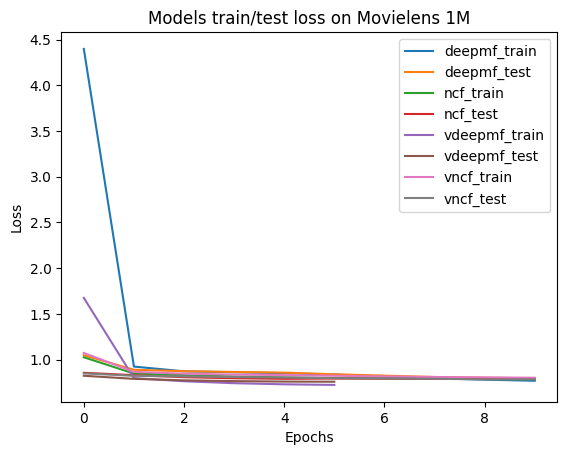

In [ ]:
plt.plot(deepmf_report.history['loss'], label='deepmf_train')
plt.plot(deepmf_report.history['val_loss'], label='deepmf_test')


plt.plot(ncf_report.history['loss'], label='ncf_train')
plt.plot(ncf_report.history['val_loss'], label='ncf_test')

plt.plot(vdeepmf_report.history['loss'], label='vdeepmf_train')
plt.plot(vdeepmf_report.history['val_loss'], label='vdeepmf_test')

plt.plot(vncf_report.history['loss'], label='vncf_train')
plt.plot(vncf_report.history['val_loss'], label='vncf_test')


plt.title('Models train/test loss on Movielens 1M')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# **Recommendations**

In [ ]:
def recommend_movies_for_user_filtered(model, user_id, df, num_items, top_n=10):
    # Items user has rated
    items_rated = df[df.user == user_id].item.values

    # Candidate items = all items except rated ones
    candidate_items = np.setdiff1d(np.arange(num_items), items_rated)

    user_array = np.full_like(candidate_items, user_id)
    preds = model.predict([user_array, candidate_items], verbose=0).flatten()

    top_indices = preds.argsort()[-top_n:][::-1]
    recommended_items = candidate_items[top_indices]
    return recommended_items

# Usage:
recommended_movie_ids = recommend_movies_for_user_filtered(DeepMF, user_id=5, df=df, num_items=num_items, top_n=10)
print(recommended_movie_ids)


[3460  892 1000 2938 3107 2875 3493 1952 3576 3261]
